In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import warnings
import itertools
import math
from sympy import *
from tabulate import tabulate
from tqdm.notebook import tqdm

render_graphs = True # want to see the graphs in output? change to True, else will hide all unimportant graphs
show_detailed_output = False # want to see lots of text in output? change to True, else will hide all unimportant graphs

df = pd.read_csv('/kaggle/input/breast-cancer/wisconsin.csv')
df2 = df.drop('Class', axis=1).drop('Sample Code Number', axis=1).drop('Uniformity of Cell Shape', axis=1)

# data_set = []
# possibilities2 = combinations(df2.columns)
# for pos in possibilities2:
#     if len(pos) == 0: continue
#     tmp_df = df2.iloc[:, pos]
#     patients = []
#     for _, patient in tmp_df.iterrows():
#         col = []
#         for _, df_cell_value in patient.items():
#             col.append(df_cell_value)
#         patients.append(col)
#     data_set.append(patients)

def combinations(original_list):
    num_subsets = 2 ** len(original_list)
    subsets = []
    for subset_index in range(num_subsets):
        subset = []
        for index in range(len(original_list)):
            if (subset_index & (1 << index)) != 0:
                subset.append(original_list[index])
        subsets.append(subset)
    return subsets
possibilities2 = combinations(df2.columns)

-> Found 256 possibilities

-> Running best 3 models...



  0%|          | 0/256 [00:00<?, ?it/s]


-> Least AIC is -1241.47359936439 at ['Uniformity of Cell Size', 'Single Epithelial Cell Size']



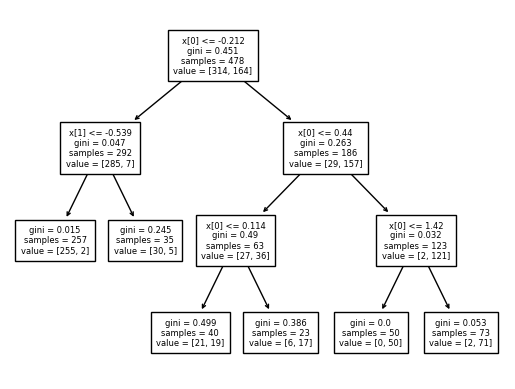

In [2]:
# DAY 8 - Making Decision Trees

# n_classes = 2
# plot_colors = "ry"
# plot_step = 0.02

# results = []
# y = df[['Class']]

# for X in possibilities2:
#     print(X)
#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#     clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
#     tree.plot_tree(clf)
#     results.append(clf.predict(X_test))
#     print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
#     aic = calculate_AIC(len(X), )
#     #print("Test - Confusion matrix :", metrics.confusion_matrix(y_test, clf.predict(X_test)))

print('-> Found', len(possibilities2), 'possibilities\n')
    
least_aic = 100
least_possibility = []
least_possibilities = pd.DataFrame(columns=['Possibility', 'AIC'])
least_possibilities_matrix = []
least_possibilities_class = []

if (show_detailed_output):
    print('Running long process...\n')

def calculate_AIC(n,mse,num_parameters):
    aic = n * log(mse) + 2 * num_parameters
    return aic

print('-> Running best 3 models...\n')

for i in tqdm(range(len(possibilities2))):
    if (i == 66 or i == 10 or i == 34):
        possibility = possibilities2[i]
        if (show_detailed_output):
            print(possibility)
        Z = []
        if (len(possibility) > 0):
            strings = ()
            for col in possibility:
                strings = strings + (f'["{possibility[0]}"]',)
            string = "+".join(strings)
            string = f'df2[{string}]'
            exec(f'X = {string}')
        else:
            exec(f'X = df2')
        
        for j in range(len(df2)):
            d = []
            for col in df2.columns:
                d.append(df2.loc[j][col])
            Z += [d]

        sc = StandardScaler()
        sc.fit(X)
        x = sc.transform(X)
        X = Z
        y = df[['Class']]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
        lr = LogisticRegression()
        lr.fit(X_train, y_train.values.ravel())
        y_pred = lr.predict(X_test)
        mse = mean_squared_error(y_test, y_pred) / 4
        n = len(y_test)
        num_parameters = len(lr.coef_[0]) + 1

        aic = calculate_AIC(n, mse, num_parameters)

        clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
                
        accuracy = clf.score(X_train, y_train)
        mse = 1 - accuracy
        n = len(y_train)
        num_parameters = clf.tree_.node_count
        
        aic = calculate_AIC(n, mse, num_parameters)
        
        tree.plot_tree(clf, fontsize = 6)
        
        if (show_detailed_output):
            print(f"Train Accuracy: {round(metrics.accuracy_score(y_train, clf.predict(X_train)) * 100, 5)}%")
            print(f"Train Confusion matrix: {metrics.confusion_matrix(y_train, clf.predict(X_train))}")
            print(f"Train Classificiation report: {metrics.classification_report(y_train, clf.predict(X_train))}")
            print(f"Test Accuracy: {round(metrics.accuracy_score(y_test, clf.predict(X_test)) * 100, 5)}%")
            print(f"Test Confusion matrix: {metrics.confusion_matrix(y_test,clf.predict(X_test))}")
            print(f"Test Classification report: {metrics.classification_report(y_test, clf.predict(X_test))}")
            print(f'AIC: {aic}\n')
        
        least_possibilities.loc[len(least_possibilities.index)] = [possibility, aic] 

        if (aic < least_aic):
            least_aic = aic
            least_possibility = possibility
        
        array = []
        
        count = 0
        
        y = df

        one = df[possibility[0]][int(len(df[possibility[0]]) * 0.7):]
        two = df[possibility[1]][int(len(df[possibility[1]]) * 0.7):]
        
        first_column = []
        for i in one:
            first_column.append(i)

        second_column = []
        for i in two:
            second_column.append(i)

        for i in y_test['Class']:
            str = f'{i}{clf.predict(X_test)[count]}'
            if (str == "44"):
                classification = 0
                # color = "red"
                # color = "mediumseagreen"
                color = "purple"
            elif (str == "42"):
                classification = 1
                # color = "blue"
                # color = "crimson"
                color = "black"
                
            elif (str == "24"):
                classification = 2
                # color = "green"
                color = "red"
            elif (str == "22"):
                classification = 3
                # color = "yellow"
                color = "green"
            
            array.append([first_column[count], second_column[count], i, clf.predict(X_test)[count], classification, color])
            count = count + 1
        
        least_possibilities_class.append(array)        
        least_possibilities_matrix.append(metrics.confusion_matrix(y_test,clf.predict(X_test)))

if (show_detailed_output):
    print('\nFinished long process')
print(f'\n-> Least AIC is {least_aic} at {least_possibility}\n')
least_possibilities = least_possibilities.sort_values(by=['AIC'], ascending=True)
if (show_detailed_output):
    print(least_possibilities[:10])
    print(least_possibilities_matrix[:10])
    print(least_possibilities_class[:10])

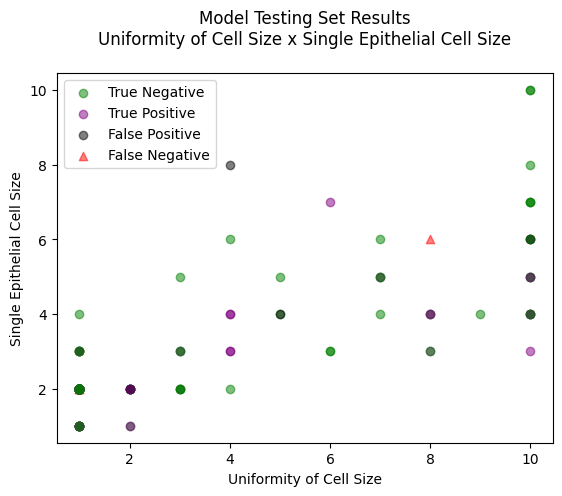

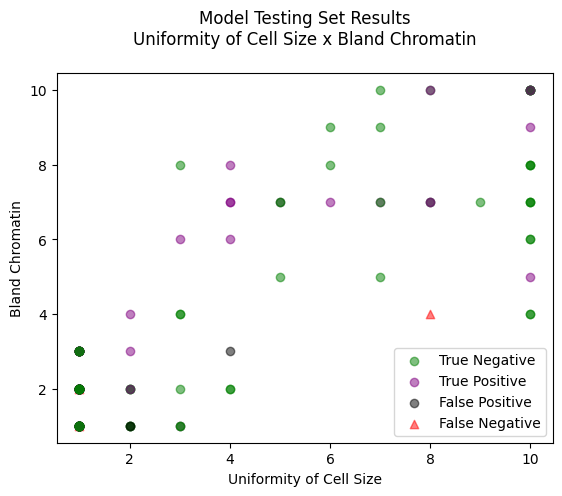

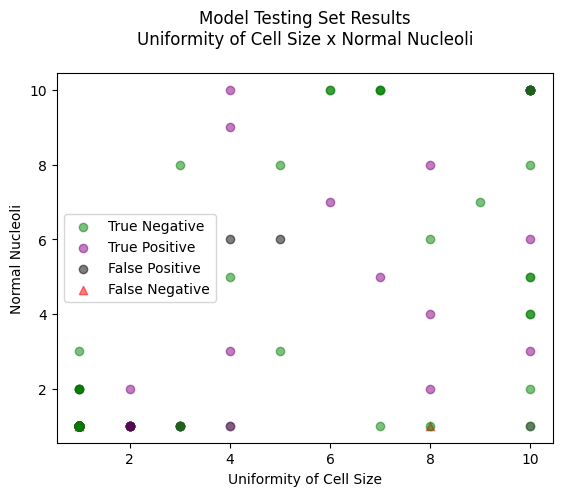

In [3]:
# DAY 9 - Classification & PCA of best possibilities

# print(least_possibilities[2:5]) # 66, 10, 34
# print(least_possibilities_matrix[2:5])

possibilities = []

#for possibility in least_possibilities[2:5]['Possibility']:
for possibility in least_possibilities['Possibility']:
    possibilities.append(possibility)

for i in range(len(possibilities)):
    if (render_graphs):
        # markers = ['o', 's', 'D', '^']
        markers = ['o', 'o', '^', 'o']
        labels = ['True Positive', 'False Positive', 'False Negative', 'True Negative']

        possibility = possibilities[i]
        matrix = least_possibilities_matrix[i]
        withClass = least_possibilities_class[i]

        fig, ax = plt.subplots()

        for row in withClass:
            x, y, _, _, classification, color = row
            ax.scatter(x, y, marker=markers[classification], color=color, alpha=0.5, label=labels[classification])

        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())
        ax.set_xlabel(possibility[0])
        ax.set_ylabel(possibility[1])
        ax.set_title(f'Model Testing Set Results\n{possibility[0]} x {possibility[1]}\n')
        plt.show()
        plt.close(fig)